# Example: Reading ECoG data from the Goose/Wireless Dataset
Si JIa Li
adapted from Mike Nolan, 2020.06.02, aoLab, UW

In [1]:
# import dependencies - 
# be sure you've installed aopy to your current environment
from aopy import datareader, datafilter
import numpy as np
import matplotlib.pyplot as plt
print('succussfully imported dependent packages')

succussfully imported dependent packages


In [2]:
# change the file paths here to reflect your current setup. 
# This is where a local copy of the data is stored on my system.

# load data
monkey_drive = 'C:\\Users\\Si Jia\\OneDrive - UW\\projects\\Brain EEG\\data\\'
date = '180328'
rec_num = '007'
rec_num_str  = 'rec' + rec_num
drive_type = 'LM1_ECOG_3'
file_type = 'lfp.dat'

# put together
data_file_full_path  = monkey_drive + date +'\\' + rec_num + '\\' \
                      + rec_num_str  + '.' + drive_type + '.' + file_type
#data_file_full_path = '/Volumes/Samsung_T5/aoLab/Data/WirelessData/Goose_Multiscale_M1/180325/001/rec001.LM1_ECOG_3.clfp.dat'


print(data_file_full_path)

C:\Users\Si Jia\OneDrive - UW\projects\Brain EEG\data\180328\007\rec007.LM1_ECOG_3.lfp.dat


In [3]:
#run some example code to check the data file names
import os,glob
data_file_name=data_file_full_path
data_file = os.path.basename(data_file_name)
print(data_file)
#data_file_kern = os.path.splitext(data_file)[0]
#print(data_file_kern)
rec_id, microdrive_name, rec_type = data_file.split('.')

print(rec_id)
print(microdrive_name)
print(rec_type)

data_path = os.path.dirname(data_file_name)
print(data_path)
# exp_file_name = os.path.join(data_path,"experiment.csv")
exp_file_name = glob.glob(data_path+"*.json")[0]
print(exp_file_name)

rec007.LM1_ECOG_3.lfp.dat


ValueError: too many values to unpack (expected 3)

In [4]:
import glob
glob.glob('C:\\Users\\Si Jia\\OneDrive - UW\\projects\\Brain EE\G\data\\180328\\007\\*.json')

[]

In [3]:

# This function loads the *lfp.dat, *mask.pkl and experiment.mat files from the given directory.
# If the mask file does not exists, loader will run the filtering algorithms required and create a mask file.
data_in, data_param, data_mask = datareader.load_ecog_clfp_data(data_file_name=data_file_full_path)
srate_in= data_param['srate']
num_ch = data_param['num_ch']
print("Finished !")

  1% (3 of 211) |                        | Elapsed Time: 0:00:00 ETA:   0:00:08

Loading data file:
No mask data file found for rec007.LM1_ECOG_3.lfp.dat
Computing data masks:
Running high frequency noise detection: lfc @ 100


100% (211 of 211) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
N/A% (0 of 211) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--C:\Users\Si Jia\AppData\Local\Programs\Python\Python38\lib\site-packages\aopy\datafilter.py:165: RuntimeWarning: divide by zero encountered in double_scalars
  sup_θ_val_mean = np.sum(np.multiply(val[np.logical_not(sup_θ_val_mask)],prob_val[np.logical_not(sup_θ_val_mask)]))/np.sum(prob_val[sup_θ_val_mask])
C:\Users\Si Jia\AppData\Local\Programs\Python\Python38\lib\site-packages\aopy\datafilter.py:160: RuntimeWarning: invalid value encountered in double_scalars
  while np.abs(θ1 - θ0) > adapt_tol:
  5% (11 of 211) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:03

Running saturated data segment detection:


100% (211 of 211) |######################| Elapsed Time: 0:00:03 Time:  0:00:03


Saving mask data for rec007.LM1_ECOG_3.lfp.dat to C:\Users\Si Jia\OneDrive - UW\projects\Brain EEG\data\180328\007\rec007.LM1_ECOG_3.lfp.mask.pkl


Text(0.5, 1.0, 'ECoG ch. 1')

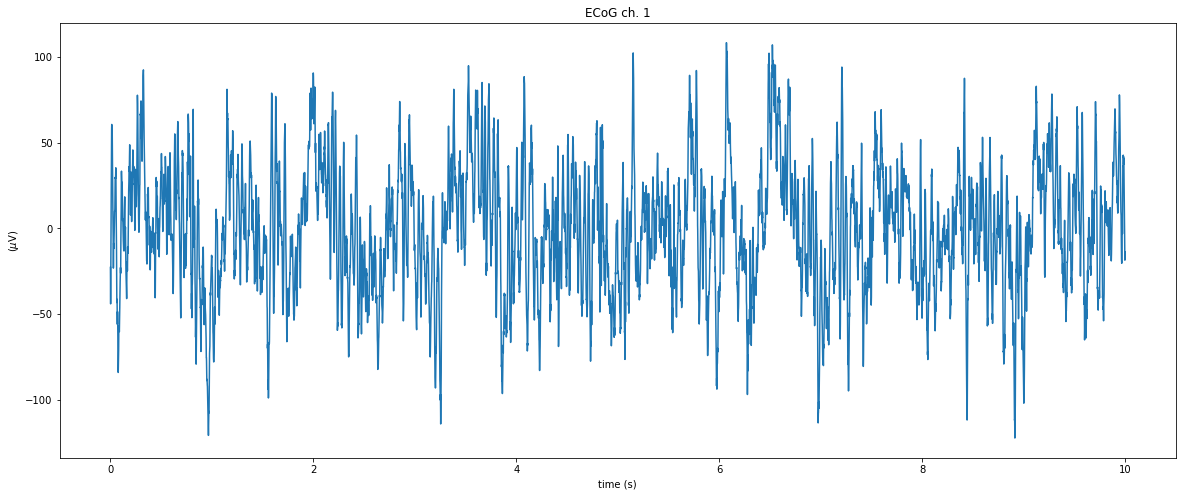

In [4]:
# plot the data 
T = 10 # (s)
n_plot = srate_in*T
plot_idx = np.arange(n_plot)
ch_idx = 0
time = plot_idx/srate_in
f,ax = plt.subplots(1,1,figsize=(20,8))
ax.plot(time,data_in[ch_idx,plot_idx])
ax.set_xlabel('time (s)')
ax.set_ylabel('($\mu$V)')
ax.set_title('ECoG ch. {}'.format(ch_idx+1))